In [ ]:

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import important library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("max_columns", None)
pd.set_option("max_rows", 200)

In [ ]:
from utils import read_input, sanity_check_1

In [ ]:
from utils import *

In [ ]:
SEED = 8

In [ ]:
INPUT_FILE = "concrete.csv"
INPUT_DIR = "./"

In [ ]:

df = read_input(INPUT_DIR, INPUT_FILE)


In [ ]:
df.shape

In [ ]:
df.head()

## EDA

### 1. Univariate analysis *(10 Marks)*

#### Checking data type is consistent

In [ ]:
sanity_df = sanity_check_1(df)

In [ ]:
sanity_df

#### Check for duplicte rows

In [ ]:
len(df)

In [ ]:
len(df.drop_duplicates())

In [ ]:
duplicate_rows = df.duplicated().sum()

In [ ]:
duplicate_rows

In [ ]:

df.drop(columns=['strength']).duplicated().sum()


In [ ]:
print(f"Duplicate rows in the data: {duplicate_rows}")

#### Sanity check of individual columns

In [ ]:
df.describe(percentiles=[0.9])

In [ ]:
univariate_df = univariate_numerical(df)

In [ ]:
univariate_df.T

`Slag, Ash and Superplastcizer can be zero. As Cement, water, coarseagg and fineagg are the important constituents of cement.`

`Age should not be zero.`

`Concrete starts developing strength after 24 hours, its gain approx 15% of its strength after 1 day and around 99% strength after 28 days. Therefore min age has to be 1.`

`Age is highly skewed`

In [ ]:
# To see skewness of age
sns.distplot(df['age'],
             hist = False)
plt.show()

In [ ]:
# Skewness of Age after log transformation

sns.distplot(np.log(df['age']),hist=False)
plt.show()

# log transformation to reduce skewness

In [ ]:

np.log(df['age']).skew()


In [ ]:
df['b'] = np.log(df['age'])

In [ ]:
df.corr()

In [ ]:
del df['b']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

X = df[['age']]
Y = df['strength']
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)


In [ ]:
df['age_b'] = np.log(df['age'])
X = df[['age_b']]
Y = df['strength']
model = LinearRegression()
model.fit(X, Y)
model.score(X, Y)

In [ ]:
del df['age_b']

In [ ]:
df['age'] = np.log(df['age'])

In [ ]:
# To see skewness of age
sns.distplot(df['age'],
             hist = False)
plt.show()

### 2. Bi-variate analysis *(10 marks)*

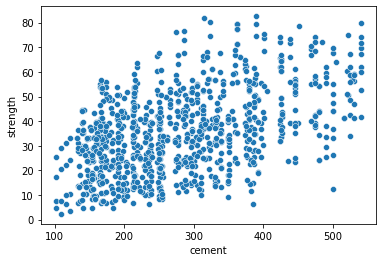

In [39]:

sns.scatterplot(x='cement',
               y='strength',
               data=df)
plt.show()


In [49]:
col1 = np.random.randint(low=1,high=100,size=(10000,))
col2 = np.log(col1)

In [50]:
dummy_df = pd.DataFrame({"col1":col1, "col2":col2})

In [51]:
dummy_df.corr()

,col1,col2
col1,1.00000,0.89571
col2,0.89571,1.00000


In [45]:
dummy_df.corr()

,col1,col2
col1,1.0,1.0
col2,1.0,1.0


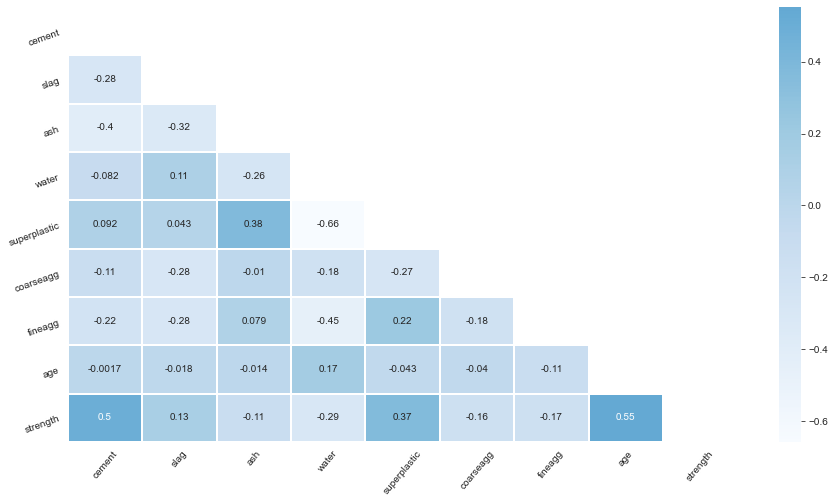

In [40]:

corr = (df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle,
            center=0.5,
            cmap= 'Blues',
            annot= True,
            xticklabels = corr.index,
            yticklabels = corr.columns,
            cbar= True,
            linewidths= 1,
            mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()


`As age is increasing strength is increasing`

`Cement and strength have a linear relationship`

`"age", "cement" have the highest correlation with the target`

In [55]:
driver='slag'

In [61]:
df['b'] = pd.qcut(df[driver], q=2, duplicates='drop')
df['b'].value_counts().sort_index()

(-0.001, 22.0]    518
(22.0, 359.4]     512
Name: b, dtype: int64

In [64]:
DEP_DRIVER='strength'

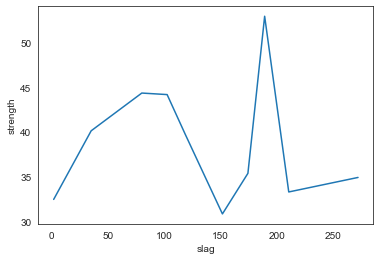

In [66]:
BUCKETS = 10
driver = 'slag'

df['b'] = pd.qcut(df[driver], q=20, duplicates='drop')

grouped = df.groupby(by=['b'])[DEP_DRIVER, driver].agg('mean')

sns.lineplot(x=driver,
            y=DEP_DRIVER,
            data=grouped)
plt.show()                                           

### 3. Feature Engineering techniques (10 marks)

In [ ]:
df.head()

In [69]:

nan_to_num = lambda x: np.nan_to_num(x, posinf=0, neginf=0)


In [70]:

df['r_water_cement'] = nan_to_num(df['water'].values / df['cement'].values)
df['r_coarseagg_fineagg'] = nan_to_num(df['coarseagg'].values / df['fineagg'].values) # Extracting a new column
df['r_slag_cement'] = nan_to_num(df['slag'].values/df['cement'].values)
df['p_ash_water'] = nan_to_num(df['ash'].values*df['water'].values)


df['agg_flag'] = df[['slag','ash','superplastic']].max(axis=1)

df['agg_flag'] = df['agg_flag'] > 0

df['slag_flag'] = df['slag'] > 0
df['ash_flag'] = df['ash'] > 0
df['superplastic_flag'] = df['superplastic'] > 0


In [71]:

features = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age','strength']

new_features = ['r_water_cement', 'r_coarseagg_fineagg', 'r_slag_cement',
         'p_ash_water','slag_flag','ash_flag','superplastic_flag','agg_flag']


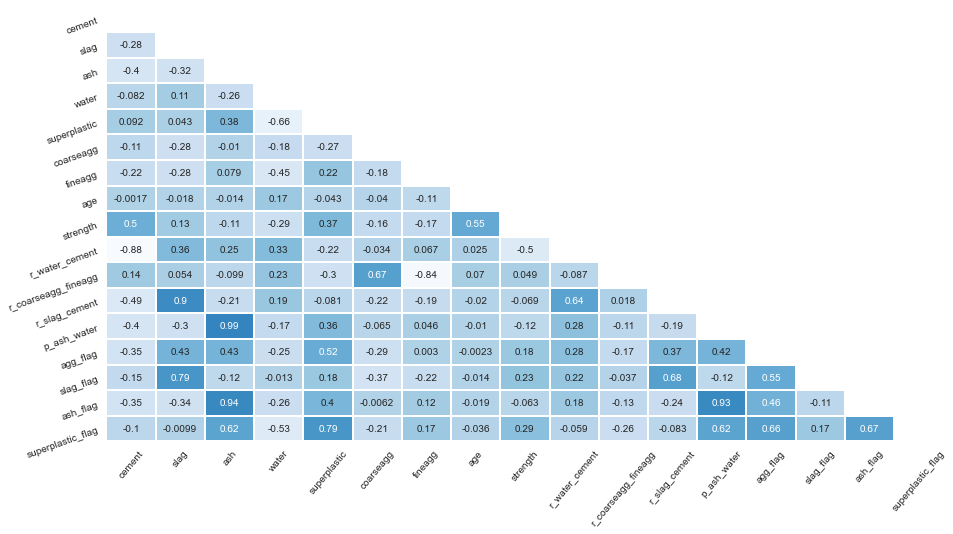

In [72]:
corr = (df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [73]:
df.to_csv("concrete_wd_features.csv",
         index=False)